<a href="https://colab.research.google.com/github/carlos-junior2/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação (Hardcore)

## Preparando o ambiente

Importando bibliotecas

In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import numpy as np
import random
import io

Carregando o dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Organizando os dados

In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN/Iris.csv')
df = pd.DataFrame(iris)
df = df.rename(columns={'SepalWidthCm': 'y', 'PetalLengthCm': 'x'})
df.head()

,Id,SepalLengthCm,y,x,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Salva as colunas específicas do csv em uma lista

In [ ]:
colunas_selecionadas = df[['Id', 'x', 'y', 'Species']]
dados = colunas_selecionadas.to_dict(orient='records')

dados[:10]

[{'Id': 1, 'x': 1.4, 'y': 3.5, 'Species': 'Iris-setosa'},
 {'Id': 2, 'x': 1.4, 'y': 3.0, 'Species': 'Iris-setosa'},
 {'Id': 3, 'x': 1.3, 'y': 3.2, 'Species': 'Iris-setosa'},
 {'Id': 4, 'x': 1.5, 'y': 3.1, 'Species': 'Iris-setosa'},
 {'Id': 5, 'x': 1.4, 'y': 3.6, 'Species': 'Iris-setosa'},
 {'Id': 6, 'x': 1.7, 'y': 3.9, 'Species': 'Iris-setosa'},
 {'Id': 7, 'x': 1.4, 'y': 3.4, 'Species': 'Iris-setosa'},
 {'Id': 8, 'x': 1.5, 'y': 3.4, 'Species': 'Iris-setosa'},
 {'Id': 9, 'x': 1.4, 'y': 2.9, 'Species': 'Iris-setosa'},
 {'Id': 10, 'x': 1.5, 'y': 3.1, 'Species': 'Iris-setosa'}]

Fazer uma cópia e embaralhar a cópia

In [ ]:
dadosEmbaralhados = dados[:]
random.shuffle(dadosEmbaralhados)

dadosEmbaralhados[:10] # imprimir uma pequena amostra

[{'Id': 84, 'x': 5.1, 'y': 2.7, 'Species': 'Iris-versicolor'},
 {'Id': 30, 'x': 1.6, 'y': 3.2, 'Species': 'Iris-setosa'},
 {'Id': 82, 'x': 3.7, 'y': 2.4, 'Species': 'Iris-versicolor'},
 {'Id': 132, 'x': 6.4, 'y': 3.8, 'Species': 'Iris-virginica'},
 {'Id': 14, 'x': 1.1, 'y': 3.0, 'Species': 'Iris-setosa'},
 {'Id': 150, 'x': 5.1, 'y': 3.0, 'Species': 'Iris-virginica'},
 {'Id': 61, 'x': 3.5, 'y': 2.0, 'Species': 'Iris-versicolor'},
 {'Id': 97, 'x': 4.2, 'y': 2.9, 'Species': 'Iris-versicolor'},
 {'Id': 136, 'x': 6.1, 'y': 3.0, 'Species': 'Iris-virginica'},
 {'Id': 77, 'x': 4.8, 'y': 2.8, 'Species': 'Iris-versicolor'}]

Dividir a lista em 80% para treino e 20% para teste


In [ ]:
treino = dadosEmbaralhados[:120]
teste = dadosEmbaralhados[120:]

print ("Treino: " , treino)
print ("Tamanho treino: ", len(treino))
print ("Teste: " , teste)
print ("Tamanho teste: ", len(teste))

Treino:  [{'Id': 84, 'x': 5.1, 'y': 2.7, 'Species': 'Iris-versicolor'}, {'Id': 30, 'x': 1.6, 'y': 3.2, 'Species': 'Iris-setosa'}, {'Id': 82, 'x': 3.7, 'y': 2.4, 'Species': 'Iris-versicolor'}, {'Id': 132, 'x': 6.4, 'y': 3.8, 'Species': 'Iris-virginica'}, {'Id': 14, 'x': 1.1, 'y': 3.0, 'Species': 'Iris-setosa'}, {'Id': 150, 'x': 5.1, 'y': 3.0, 'Species': 'Iris-virginica'}, {'Id': 61, 'x': 3.5, 'y': 2.0, 'Species': 'Iris-versicolor'}, {'Id': 97, 'x': 4.2, 'y': 2.9, 'Species': 'Iris-versicolor'}, {'Id': 136, 'x': 6.1, 'y': 3.0, 'Species': 'Iris-virginica'}, {'Id': 77, 'x': 4.8, 'y': 2.8, 'Species': 'Iris-versicolor'}, {'Id': 45, 'x': 1.9, 'y': 3.8, 'Species': 'Iris-setosa'}, {'Id': 118, 'x': 6.7, 'y': 3.8, 'Species': 'Iris-virginica'}, {'Id': 21, 'x': 1.7, 'y': 3.4, 'Species': 'Iris-setosa'}, {'Id': 66, 'x': 4.4, 'y': 3.1, 'Species': 'Iris-versicolor'}, {'Id': 149, 'x': 5.4, 'y': 3.4, 'Species': 'Iris-virginica'}, {'Id': 74, 'x': 4.7, 'y': 2.8, 'Species': 'Iris-versicolor'}, {'Id': 104, 'x

## Funções independentes


Realiza o cálculo da distancia euclidiana.

\begin{align}
        \text{} d(x,y)= &\sqrt{\sum_{i=0}^n (xi-yi)^2 }    \\[1em]
\end{align}



In [ ]:
def distEuclid (ponto1, ponto2):
  return (((ponto1.get('x') - ponto2.get('x'))**2 + (ponto1.get('y') - ponto2.get('y'))**2)**0.5)

Pontos para teste da função distEuclid()

In [ ]:
ponto1 = {'x': 2, 'y': 5}
ponto2 = {'x': 3, 'y': 4}
distEuclid(ponto1, ponto2)

1.4142135623730951

 Função que calcula a distancia euclidiana de um teste em relação a todos os pontos de treino, tem como
 retorno uma lista de distancias ordenada


In [ ]:
def retornaPontosProximos (indiceTeste):
  pontosProximos = []

  for i in range(len(treino)):
    pontosProximos.append({'Id' : treino[i].get('Id'), 'distancia' : distEuclid(treino[i], teste[indiceTeste]), 'classe' : treino[i].get('Species')})

  pontosProximos.sort(key=lambda x: x['distancia'])

  return pontosProximos

In [ ]:
def classificador (k, pontosProximos):
  valores = pontosProximos[:k]
  setosa = 0
  versicolor = 0
  virginica = 0
  for i in valores:
    if i.get('classe') == 'Iris-setosa':
      setosa += 1
    elif i.get('classe') == 'Iris-versicolor':
      versicolor += 1
    else:
      virginica += 1

  if setosa > versicolor and setosa > virginica:
    return 'Iris-setosa'
  elif versicolor > setosa and versicolor > virginica:
    return 'Iris-versicolor'
  elif virginica > versicolor and virginica > setosa:
    return 'Iris-virginica'

In [ ]:
def classeId(classe):
  if classe == 'Iris-setosa':
    return 0
  elif classe == 'Iris-versicolor':
    return 1
  elif classe == 'Iris-virginica':
    return 2
  else:
    print(f"A classe {classe} é inválida!")
    return -1

## Funções dependentes

In [ ]:
def executaTeste(i, k):
  pontosProximos = retornaPontosProximos(i)
  return classificador(k, pontosProximos)

In [ ]:
def testeKNN(k, debugMode):
  acertou = 0
  errou = 0
  matrix_confusao = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

  for i in range(len(teste)):
    valorPredito = classeId(executaTeste(i, k))
    valorReal = classeId(teste[i].get('Species'))

    matrix_confusao[valorReal][valorPredito] += 1

    if (valorPredito == valorReal):
      acertou += 1
    else:
      errou += 1
    if debugMode:
      print("ID Dado testado: ", teste[i].get('Id'))
      print("Classe original: ", teste[i].get('Species'))
      print("Classe classificada: ", executaTeste(i, k))

  acuracia = round((acertou/len(teste))*100, 2)

  if debugMode:
    print(f"Acertos: {acertou}   Erros: {errou}    Acuracia: {acuracia}%")

  return acuracia, matrix_confusao


## Funções de plotagem

In [ ]:

def plotMatrix(matriz, titulo):
  matriz_np = np.array(matriz)

  plt.imshow(matriz_np, cmap='viridis', interpolation='nearest')

  plt.colorbar()

  plt.xticks([0, 1, 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
  plt.yticks([0, 1, 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
  plt.title(titulo)
  plt.xlabel('Valores Preditos')
  plt.ylabel('Valores Reais')

  for i in range(len(matriz)):
    for j in range(len(matriz[0])):
      plt.text(j, i, str(matriz[i][j]), ha='center', va='center', color='black')

  plt.show()

In [ ]:
def plotGraficoBarra(categorias, valores, titulo, xlabel, ylabel):
  plt.bar(categorias, valores)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(titulo)
  plt.yscale('linear')

  for i, v in enumerate(valores):
    plt.text(i, v/2, str(v), color='white', ha='center', va='center')

  plt.show()

## Metricas de avaliação

Calcula o recall macro para um problema de classificação multiclasse.

In [ ]:
def calcular_revocacao(classes_reais, classes_previstas):
    num_classes = len(set(classes_reais))
    revocacao = []

    for classe in range(num_classes):
        tp = 0  # Verdadeiros positivos
        fn = 0  # Falsos negativos

        for i in range(len(classes_reais)):
            if classeId(classes_reais[i]) == classe:
                if classeId(classes_reais[i]) == classeId(classes_previstas[i]):
                    tp += 1
                else:
                    fn += 1

        if tp + fn == 0:
            revocacao.append(0)
        else:
            revocacao.append(tp / (tp + fn))

    revocacao_macro = sum(revocacao) / len(revocacao)
    return revocacao_macro

def revocacao(k):
  classes_reais = []
  classes_previstas = []

  for i in range(len(teste)):
      classe_real = teste[i].get('Species')
      classe_prevista = executaTeste(i, k)
      classes_reais.append(classe_real)
      classes_previstas.append(classe_prevista)

  revocacao = calcular_revocacao(classes_reais, classes_previstas)
  return f"Revocacao para K = {k}: {round(revocacao,2)}"

Calcular a precisão macro para um problema de classificacao multiclasse

In [ ]:
def calcular_precisao(classes_reais, classes_previstas):
    num_classes = len(set(classes_reais))
    precisoes = []

    for classe in range(num_classes):
        tp = 0  # Verdadeiros positivos
        fp = 0  # Falsos positivos

        for i in range(len(classes_reais)):
            if classeId(classes_previstas[i]) == classe:  # Se a classe prevista for a classe atual
                if classeId(classes_reais[i]) == classeId(classes_previstas[i]):  # Se a previsão estiver correta
                    tp += 1
                else:  # Se a previsão estiver incorreta
                    fp += 1

        if tp + fp == 0:  # Evita divisão por zero se não houver previsões para a classe
            precisoes.append(0)
        else:
            precisoes.append(tp / (tp + fp))

    precisao_macro = sum(precisoes) / len(precisoes)  # Calcula a média das precisões
    return precisao_macro

def precisao(k):
  classes_reais = []
  classes_previstas = []

  for i in range(len(teste)):
      classe_real = teste[i].get('Species')
      classe_prevista = executaTeste(i, k)
      classes_reais.append(classe_real)
      classes_previstas.append(classe_prevista)

  return f"Precisão para K = {k}: {round(calcular_precisao(classes_reais, classes_previstas),2)}"

In [ ]:
def calculaMetricas(k):
  print(revocacao(k))
  print(precisao(k))

## Treino

In [ ]:
k1, mc1 = testeKNN(1, False)
k3, mc2 = testeKNN(3, False)
k5, mc3 = testeKNN(5, False)
k7, mc4 = testeKNN(7, False)

print("K = 1")
print(mc1)
print("K = 3")
print(mc2)
print("K = 5")
print(mc3)
print("K = 7")
print(mc4)

K = 1
[[11, 0, 0], [0, 9, 1], [0, 1, 8]]
K = 3
[[11, 0, 0], [0, 10, 0], [0, 0, 9]]
K = 5
[[11, 0, 0], [0, 9, 1], [0, 1, 8]]
K = 7
[[11, 0, 0], [0, 9, 1], [0, 0, 9]]


## Avaliação

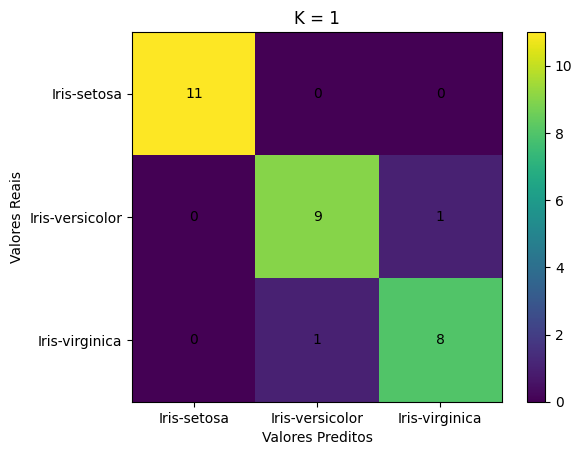

Acurácia: 93.33%
Revocacao para K = 1: 0.93
Precisão para K = 1: 0.93


In [ ]:
plotMatrix(mc1, "K = 1")
print(f"Acurácia: {k1}%")
calculaMetricas(1)

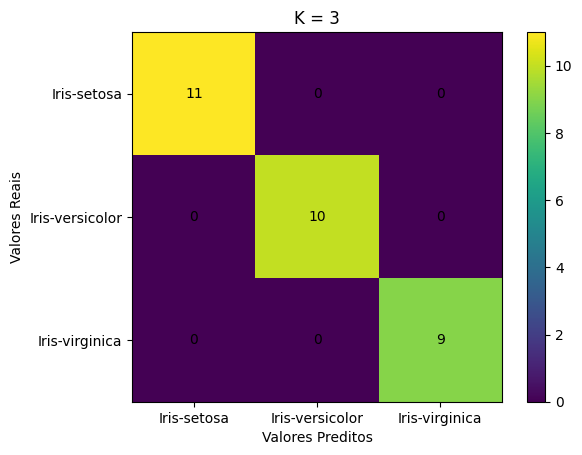

Acurácia: 100.0%
Revocacao para K = 3: 1.0
Precisão para K = 3: 1.0


In [ ]:
plotMatrix(mc2, "K = 3")
print(f"Acurácia: {k3}%")
calculaMetricas(3)

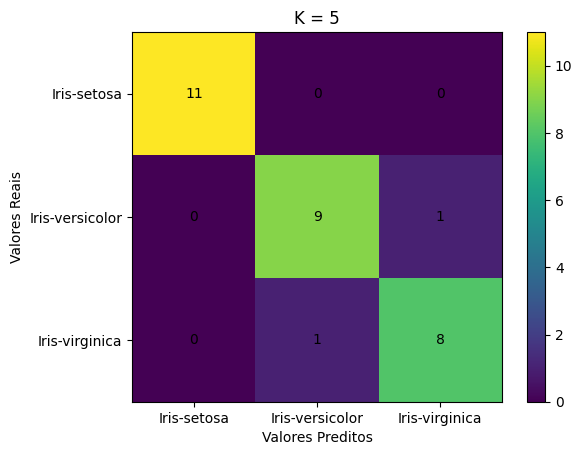

Acurácia: 93.33%
Revocacao para K = 5: 0.93
Precisão para K = 5: 0.93


In [ ]:
plotMatrix(mc3, "K = 5")
print(f"Acurácia: {k5}%")
calculaMetricas(5)

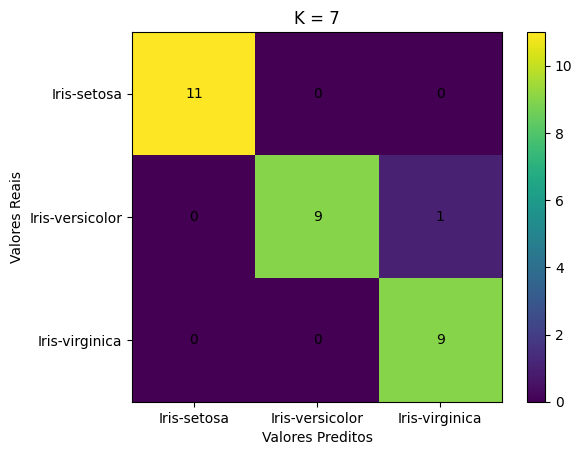

Acurácia: 96.67%
Revocacao para K = 7: 0.97
Precisão para K = 7: 0.97


In [ ]:
plotMatrix(mc4, "K = 7")
print(f"Acurácia: {k7}%")
calculaMetricas(7)

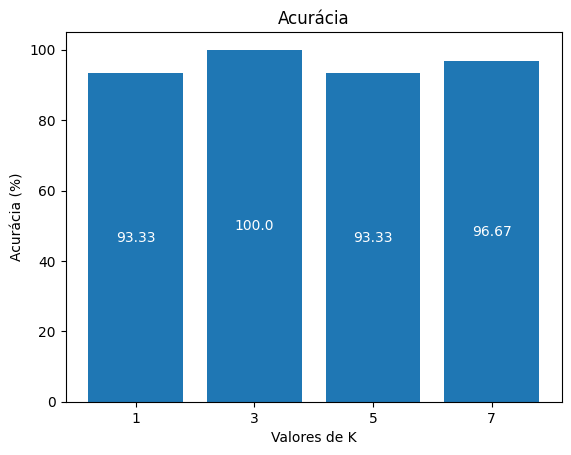

In [ ]:
plotGraficoBarra(['1', '3', '5', '7'], [k1, k3, k5, k7], 'Acurácia', 'Valores de K', 'Acurácia (%)')

# Implemetação usando Scikit-learn

Bibliotecas

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score


In [ ]:
iris = load_iris()
X = iris.data  # Dados das características
y = iris.target  # Rótulos das classes

Dividir os dados em conjuntos de treinamento e teste, sendo 80% para treinamento, 20% para teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Criar e treinar o classificador KNN

In [ ]:
def treina_e_calcula_metricas(k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)

  cm = confusion_matrix(y_test, y_pred)

  recall = recall_score(y_test, y_pred, average='macro')

  precision = precision_score(y_test, y_pred, average='macro')

  plotMatrix(cm, f"(sklearn) k = {k}")

  print("Acurácia:", accuracy)
  print("Recall:", recall)
  print("Precisão:", precision)

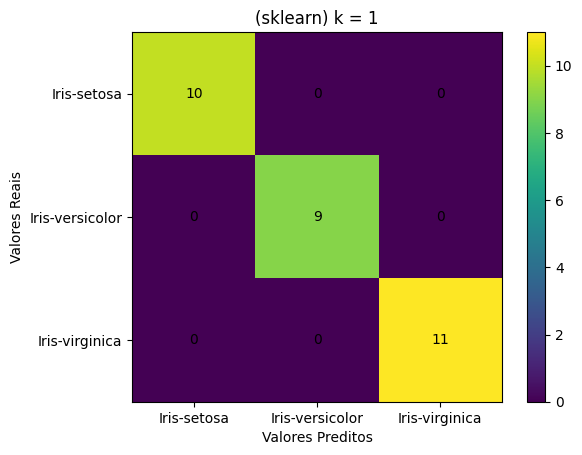

Acurácia: 1.0
Recall: 1.0
Precisão: 1.0


In [ ]:
treina_e_calcula_metricas(1)

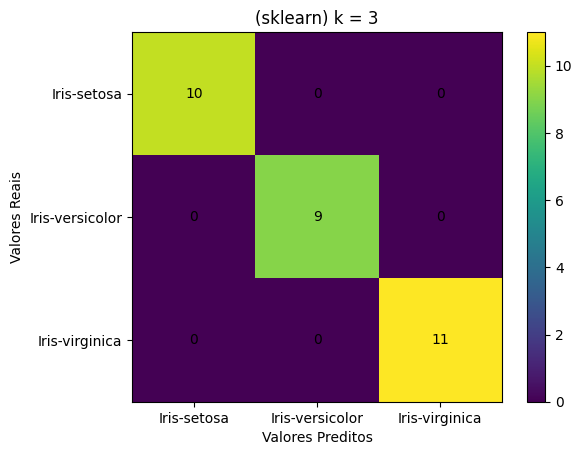

Acurácia: 1.0
Recall: 1.0
Precisão: 1.0


In [ ]:
treina_e_calcula_metricas(3)

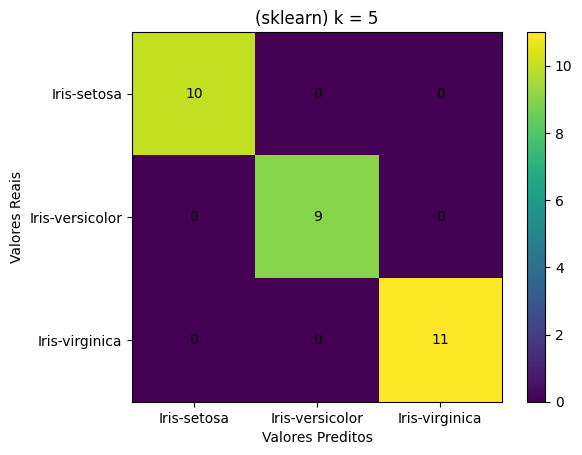

Acurácia: 1.0
Recall: 1.0
Precisão: 1.0


In [ ]:
treina_e_calcula_metricas(5)

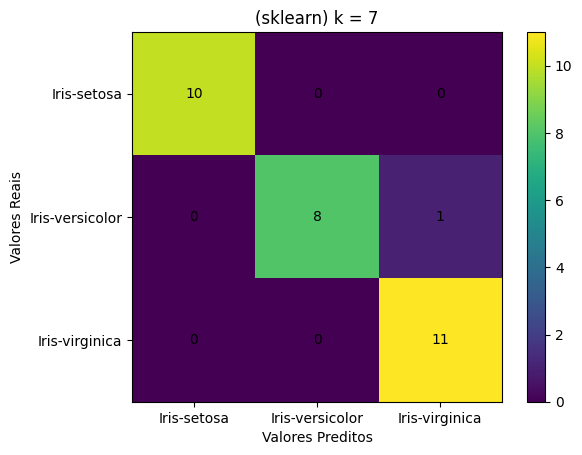

Acurácia: 0.9666666666666667
Recall: 0.9629629629629629
Precisão: 0.9722222222222222


In [ ]:
treina_e_calcula_metricas(7)

# Relatorio

# Relatório de Classificação de Iris com KNN

## Introdução

Este relatório apresenta os resultados da classificação da base de dados Iris utilizando o algoritmo K-Nearest Neighbors (KNN). O objetivo é avaliar o desempenho do algoritmo para diferentes valores de K e comparar os resultados com a implementação do Scikit-learn.

## Metodologia

O algoritmo KNN foi implementado de forma manual e utilizando a biblioteca Scikit-learn. Os dados foram divididos em conjuntos de treinamento e teste, com 80% para treinamento e 20% para teste na implementação manual e 70% para treinamento e 30% para teste na implementação do Scikit-learn. Foram utilizados os valores de K = 1, 3, 5 e 7 para avaliar o desempenho do algoritmo.

## Resultados

### Implementação Manual

**Matrizes de Confusão:**

* Incluir as matrizes de confusão geradas para cada valor de K.

**Gráfico de Acurácia:**

* Incluir o gráfico de barras com a acurácia para cada valor de K.

**Métricas de Avaliação:**

* Incluir a precisão e revocação para cada valor de K.

### Implementação com Scikit-learn

**Matrizes de Confusão:**

* Incluir as matrizes de confusão geradas para cada valor de K.

**Métricas de Avaliação:**

* Incluir a acurácia, precisão e revocação para cada valor de K.

## Análise dos Resultados

Comparar os resultados obtidos com a implementação manual e com o Scikit-learn. Analisar o desempenho do algoritmo para diferentes valores de K e identificar o valor que apresentou melhor resultado. Discutir as vantagens e desvantagens do algoritmo KNN para este problema de classificação.

## Conclusões

Apresentar as conclusões sobre o desempenho do algoritmo KNN para a classificação da base de dados Iris.